## Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, convolve , median_filter
from scipy.signal import convolve2d
from PIL import Image
from tqdm import tqdm
import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import show_img, RGB_image, gray_image, degradation_operator, gaussian_denoising, median_denoising, H_fun, HT_fun, convergence, generate_gaussian_kernel, generate_gaussian_kernel2, calculate_psnr3
from skimage.metrics import peak_signal_noise_ratio as psnr



## Importing the Image

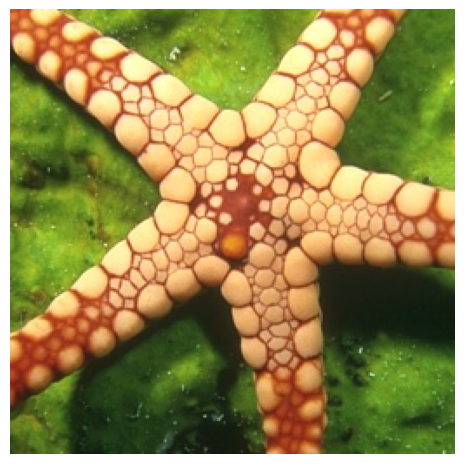

In [2]:
img_path = 'test_images/starfish.tif'
# show_img(img_path)
rgb_img = RGB_image(img_path)
show_img(rgb_img)

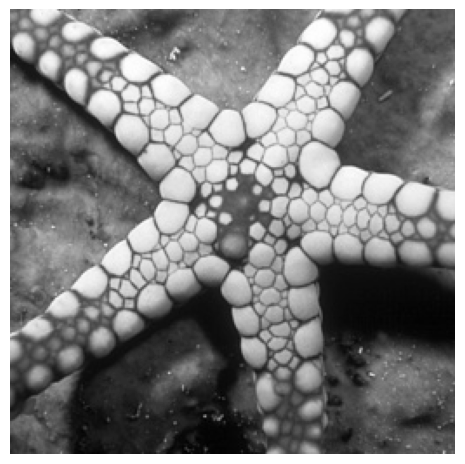

In [ ]:
Gray_img = gray_image(img_path)
show_img(Gray_img)

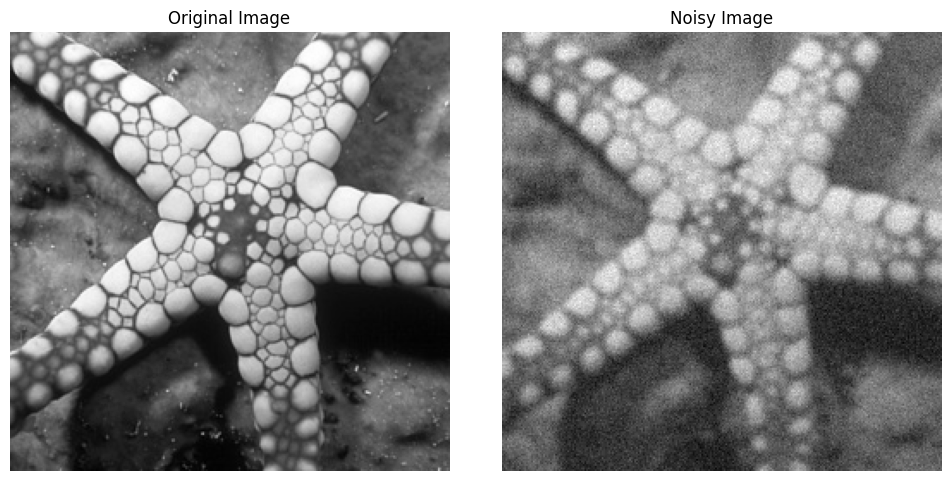

In [ ]:
kernel = generate_gaussian_kernel(kernel_size= 5 , sigma_blur=5)

# Simulate a blurred image by applying the degradation operator (blurring)
blurred_img = degradation_operator(Gray_img, kernel)

# Add Gaussian noise to the blurred image
noise_std = 0.05
noisy_img = blurred_img + noise_std * np.random.randn(*blurred_img.shape)

# Show the blurred and noisy image
show_img(Gray_img, noisy_img, titles=['Original Image','Noisy Image'])

## Testing on Gray Images

  0%|          | 0/70 [00:00<?, ?it/s]

100%|██████████| 70/70 [01:15<00:00,  1.08s/it]


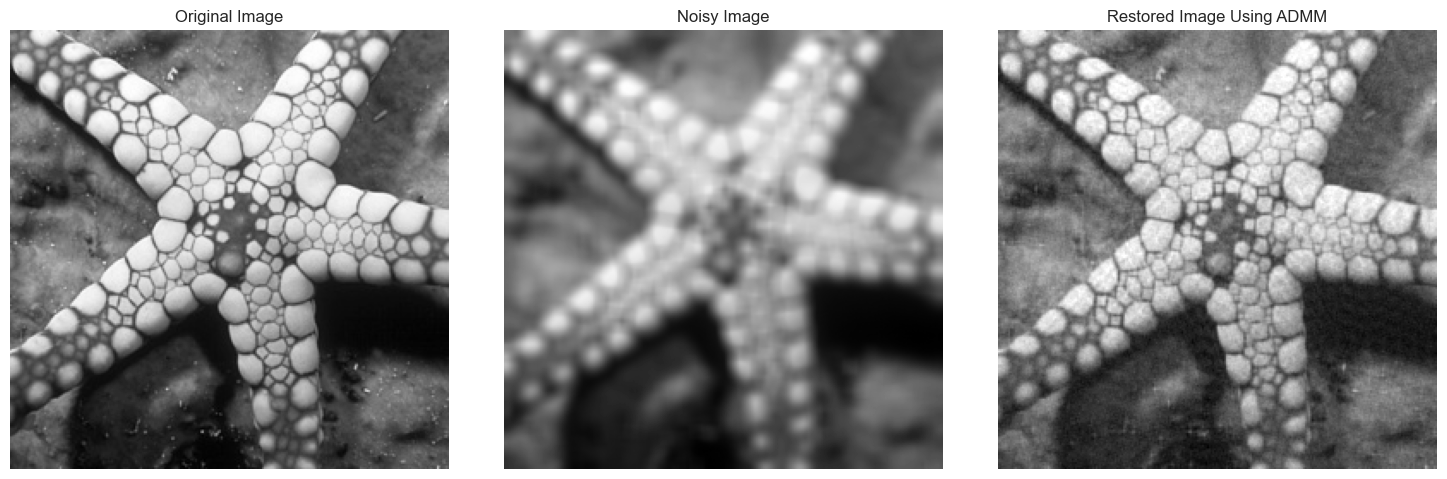

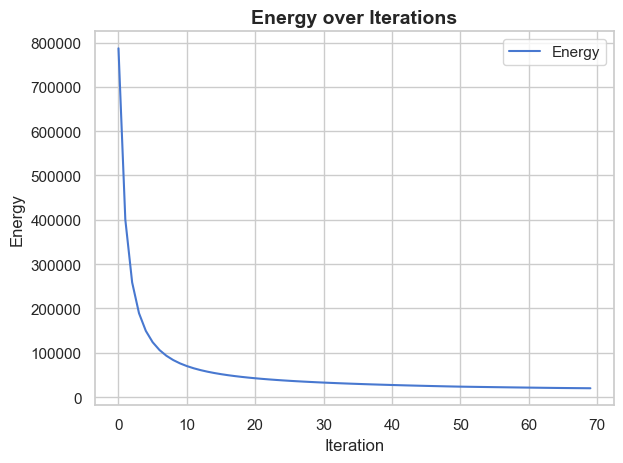

The original image psnr is :  inf dB
The noisy image psnr is :  21.6609610368128 dB
The reconstructed image psnr is :  28.732102301267656 dB


c:\Users\lenonvo\Desktop\Coding Projects\RED DENOISER\RedEnv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_12012\1174448695.py:33: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_12012\1174448695.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_admm), "dB")


In [ ]:

original_img = gray_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)


N = 70       
m1 = 10       
m2 = 1         
lambd = 0.01     
beta = 0.05     
sigma = 0.001  
denoising_sigma = 0.001 
tol=1e-2

from ADMM import RED_ADMM_Solver

noisy_img = np.asarray(noisy_img)
red = RED_ADMM_Solver(noisy_img, kernel, denoising_sigma, lambd, beta, sigma, N, m1, m2, tol)
restored_img_admm, energy_values = red.run()
show_img(original_img, noisy_img ,restored_img_admm, titles= ['Original Image', 'Noisy Image','Restored Image Using ADMM'])
convergence(energy_values)


print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_admm), "dB")

100%|██████████| 500/500 [00:35<00:00, 14.18it/s]


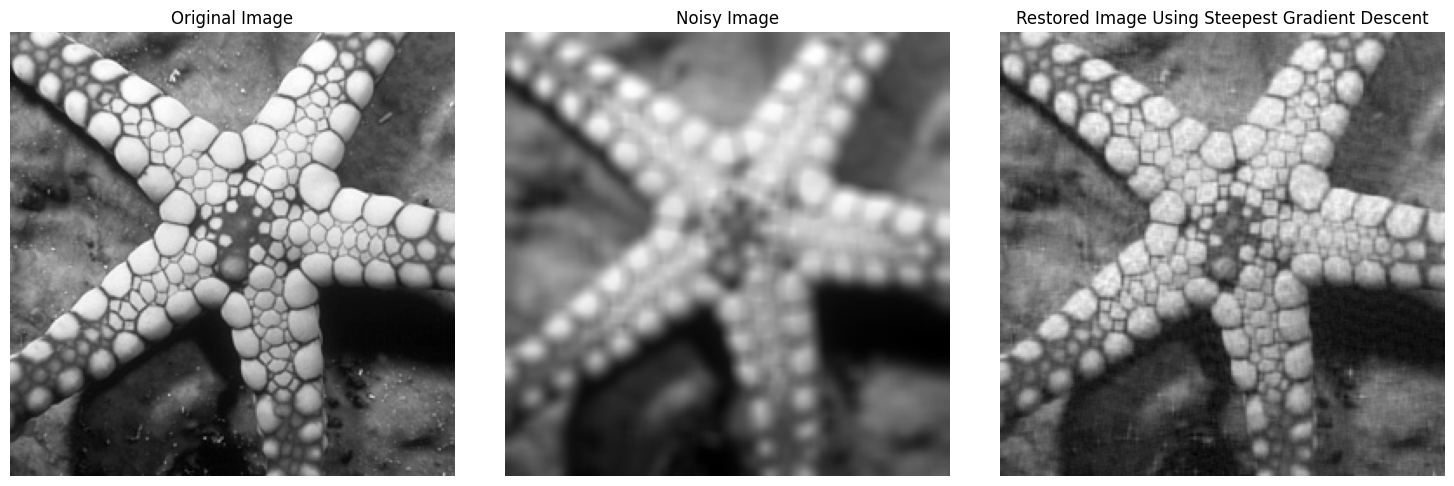

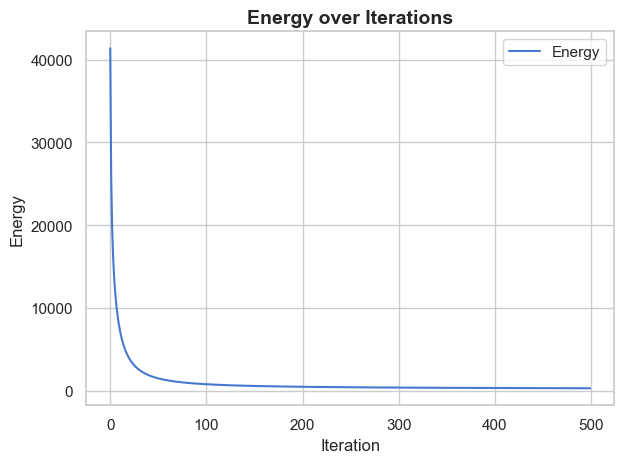

The original image psnr is :  inf dB
The noisy image psnr is :  21.660797243185314 dB
The reconstructed image psnr is :  28.258355096015315 dB


c:\Users\lenonvo\Desktop\Coding Projects\RED DENOISER\RedEnv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1248\2963299984.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_1248\2963299984.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")


In [ ]:
original_img = gray_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)

sigma = 0.01  
lambda_ = 0.01  
num_iterations = 500  
sigma_denoise = 0.001 

from Steepest_Descent import steepest_descent_red

# Run RED with steepest descent
restored_img_sg, energy_values = steepest_descent_red(
        y=noisy_img,
        kernel= kernel,
        sigma=sigma,
        sigma_f = sigma_denoise,
        lambda_= lambda_,
        num_iterations=num_iterations,
        tol= 1e-6
    )

show_img(original_img, noisy_img ,restored_img_sg, titles= ['Original Image', 'Noisy Image','Restored Image Using Steepest Gradient Descent'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")

100%|██████████| 100/100 [00:42<00:00,  2.36it/s]


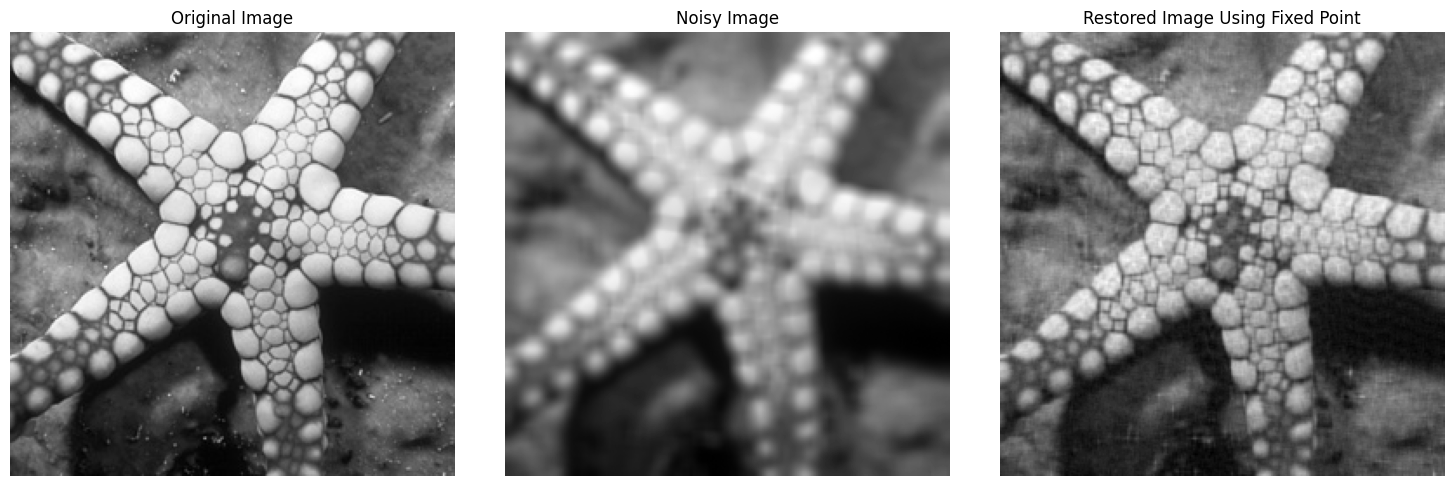

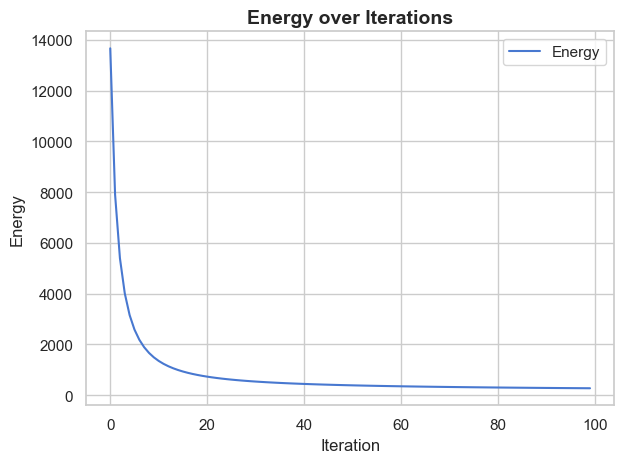

The original image psnr is :  inf dB
The noisy image psnr is :  21.66094317087637 dB
The reconstructed image psnr is :  28.265688967768895 dB


c:\Users\lenonvo\Desktop\Coding Projects\RED DENOISER\RedEnv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_2800\87230640.py:37: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_2800\87230640.py:38: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_fixed), "dB")


In [ ]:
original_img = gray_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)

sigma = 0.01  
lambda_ = 0.01  
N = 100 
m = 5
sigma_denoise = 0.001  

from Fixed_Point import fixed_point_red

restored_img_fixed, energy_values = fixed_point_red(
    y = noisy_img,
    kernel= kernel,
    sigma = sigma,
    sigma_f= sigma_denoise,
    lambda_= lambda_,
    N = N,
    m = m

)



show_img(original_img, noisy_img ,restored_img_fixed, titles= ['Original Image', 'Noisy Image','Restored Image Using Fixed Point'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_fixed), "dB")

## Steepest Descent

100%|██████████| 500/500 [01:47<00:00,  4.66it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05134251642229641..1.000259165798356].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.005321142740183715..1.1145016442940299].


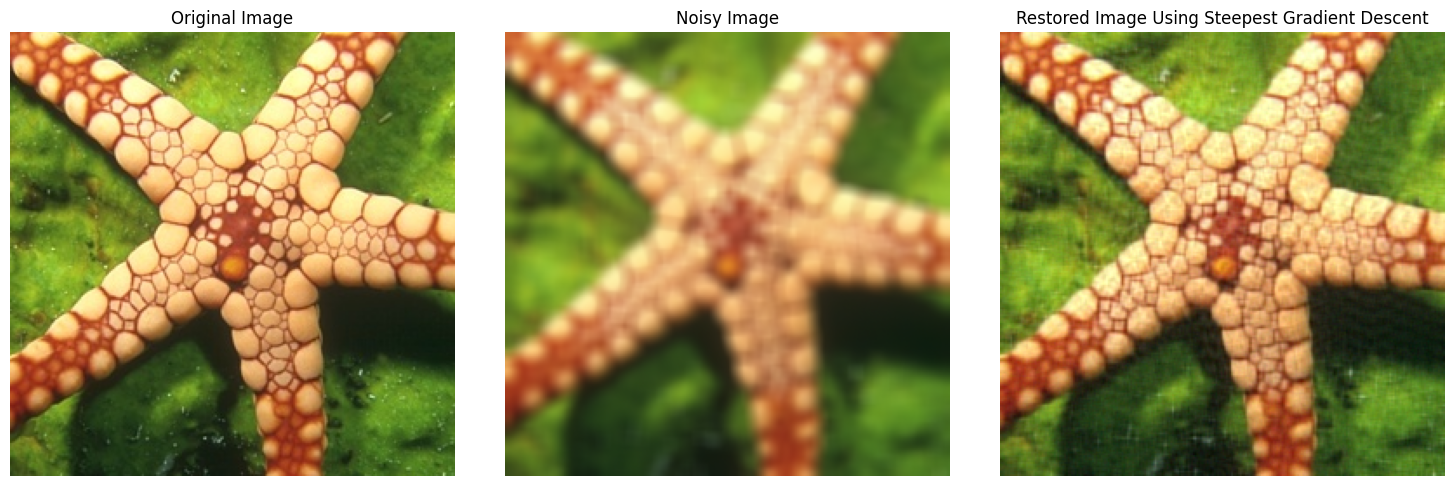

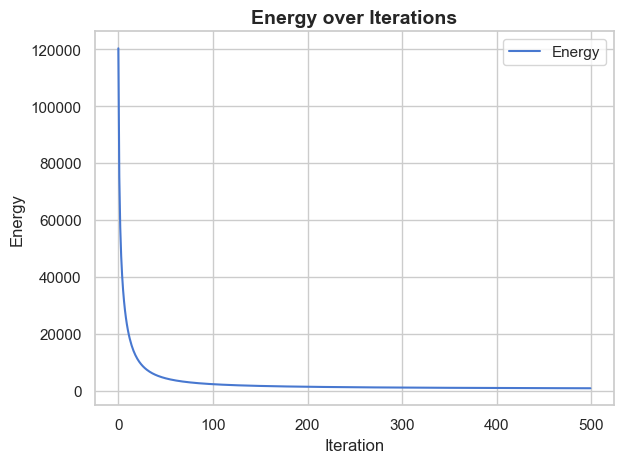

The original image psnr is :  inf dB
The noisy image psnr is :  21.79870080505046 dB
The reconstructed image psnr is :  28.312944764820042 dB


c:\Users\lenonvo\Desktop\Coding Projects\RED DENOISER\RedEnv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_12544\348284216.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_12544\348284216.py:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")


In [3]:
# Load the colored image
original_img = RGB_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)

sigma = 0.01  
lambda_ = 0.01 
num_iterations = 500  
sigma_denoise = 0.001  

from Steepest_Descent_RGB import steepest_descent_red_all

restored_img_sg, energy_values = steepest_descent_red_all(
        y=noisy_img,
        kernel= kernel,
        sigma=sigma,
        sigma_f = sigma_denoise,
        lambda_= lambda_,
        num_iterations=num_iterations,
        tol= 1e-6
    )

show_img(original_img, noisy_img ,restored_img_sg, titles= ['Original Image', 'Noisy Image','Restored Image Using Steepest Gradient Descent'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 20.44it/s]


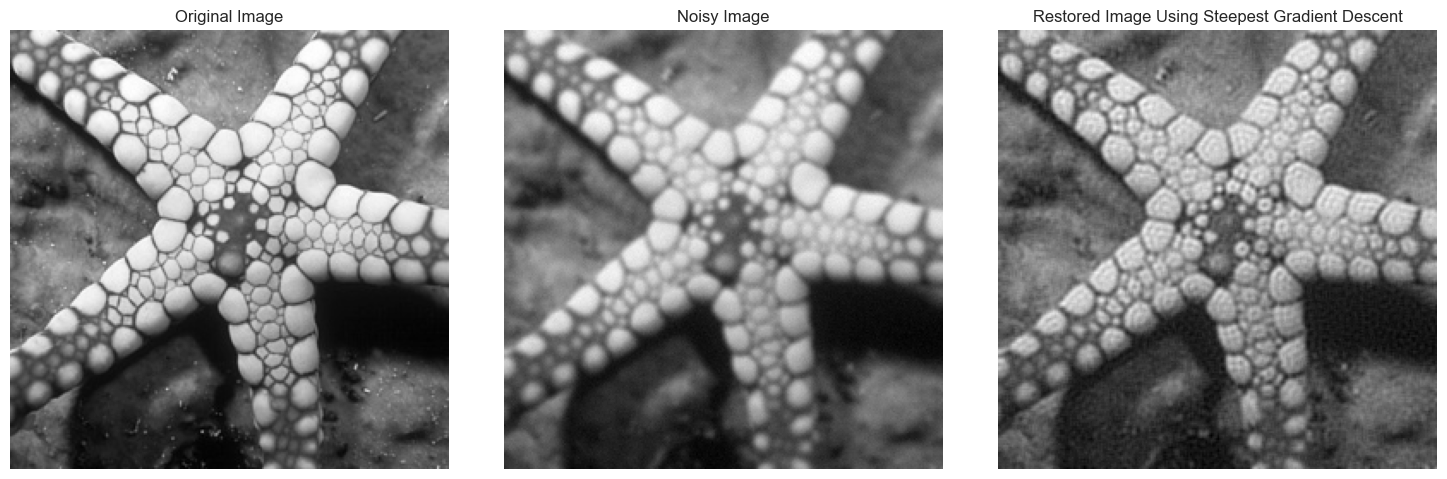

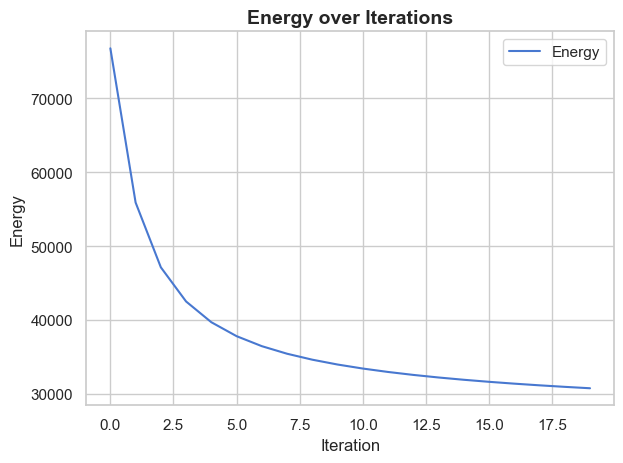

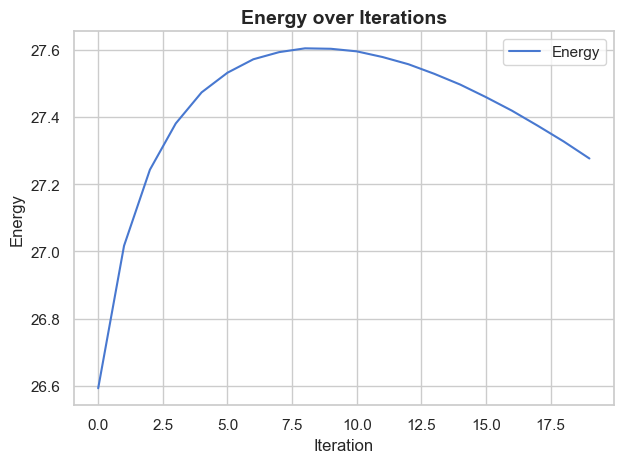

The original image psnr is :  inf dB
The noisy image psnr is :  25.569463000153277 dB
The reconstructed image psnr is :  27.27600504759733 dB


C:\Users\Hani\AppData\Local\Temp\ipykernel_9396\2563189652.py:37: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\Hani\AppData\Local\Temp\ipykernel_9396\2563189652.py:38: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")


In [13]:
# Load the gray image
original_img = gray_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 5, sigma_blur = 2)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.01
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)

sigma = 0.01  
lambda_ = 0.01 
num_iterations = 20  
sigma_denoise = 0.001  

from Steepest_Descent_RGB import steepest_descent_red_all

# Run RED with steepest descent
restored_img_sg, energy_values, psnrs = steepest_descent_red_all(
        original_image=original_img,
        y=noisy_img,
        kernel= kernel,
        sigma=sigma,
        sigma_f = sigma_denoise,
        lambda_= lambda_,
        num_iterations=num_iterations,
        tol= 1e-6
    )

show_img(original_img, noisy_img ,restored_img_sg, titles= ['Original Image', 'Noisy Image','Restored Image Using Steepest Gradient Descent'])
convergence(energy_values)
convergence(psnrs)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_sg), "dB")

## Fixed Point 

100%|██████████| 100/100 [02:57<00:00,  1.77s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.052402890549864745..1.0002871976560201].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1057849167966922].


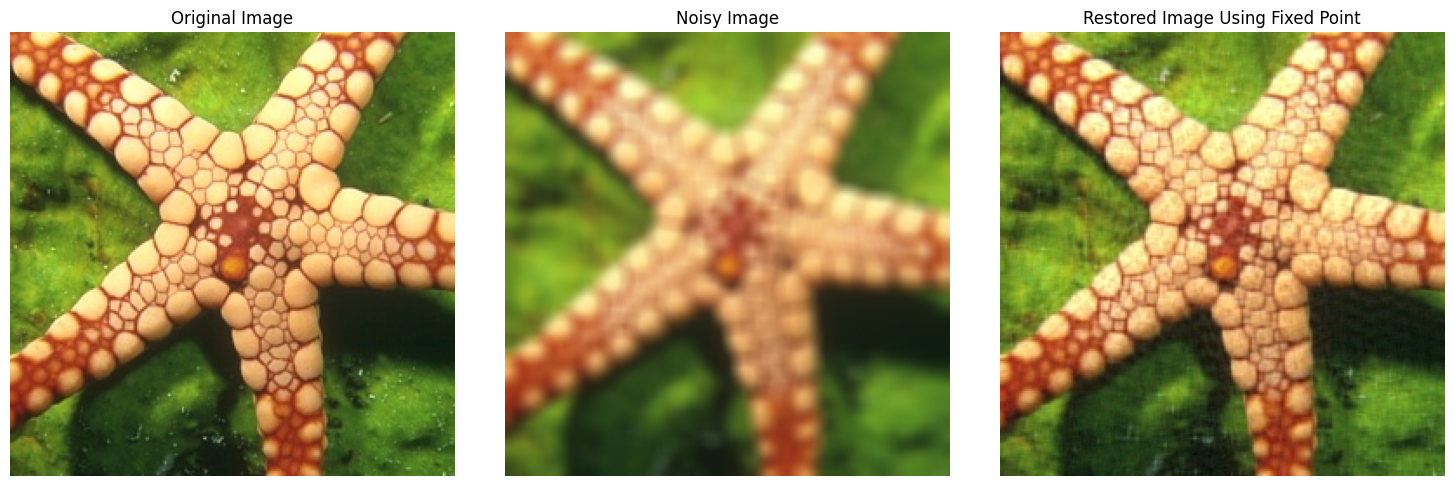

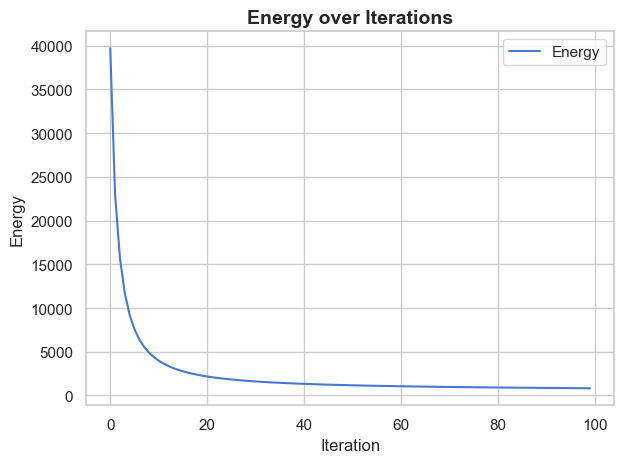

The original image psnr is :  inf dB
The noisy image psnr is :  21.798487715326694 dB
The reconstructed image psnr is :  28.320947602767703 dB


c:\Users\Hani\Desktop\All\RED\RedVirtualEnv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
C:\Users\Hani\AppData\Local\Temp\ipykernel_10632\3374355014.py:38: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\Hani\AppData\Local\Temp\ipykernel_10632\3374355014.py:39: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_fixed), "dB")


In [3]:
# Load the colored image
original_img = RGB_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)

sigma = 0.01  
lambda_ = 0.01  
N = 100  
m = 5
sigma_denoise = 0.001

from Fixed_Point_RGB import fixed_point_red_all

restored_img_fixed, energy_values = fixed_point_red_all(
    y = noisy_img,
    kernel= kernel,
    sigma = sigma,
    sigma_f= sigma_denoise,
    lambda_= lambda_,
    N = N,
    m = m

)



show_img(original_img, noisy_img ,restored_img_fixed, titles= ['Original Image', 'Noisy Image','Restored Image Using Fixed Point'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_fixed), "dB")

100%|██████████| 100/100 [00:48<00:00,  2.06it/s]


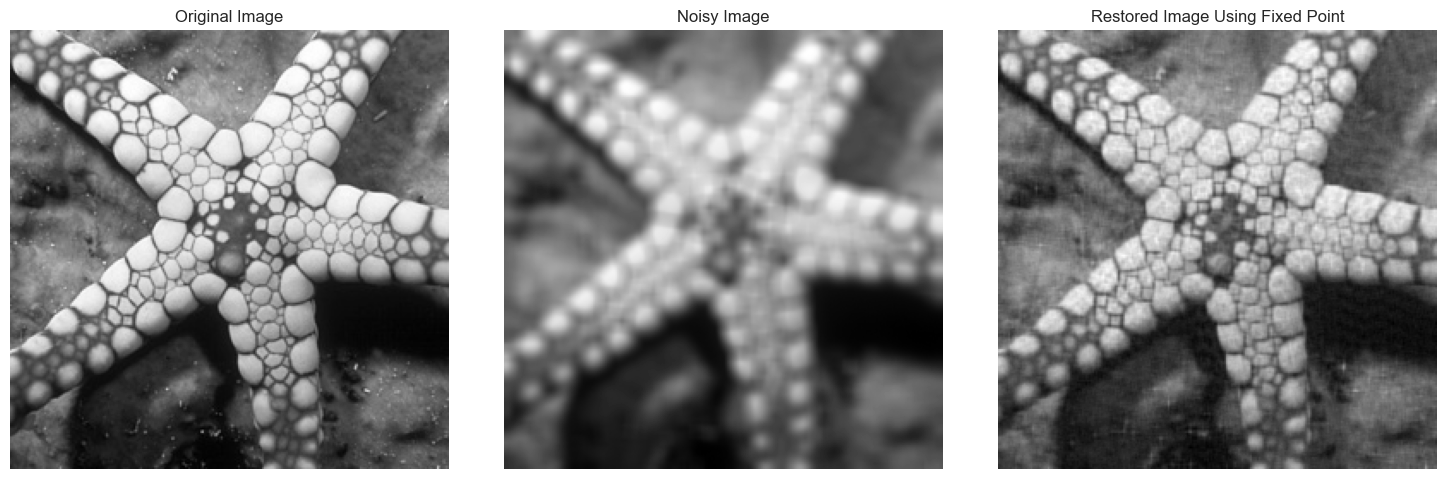

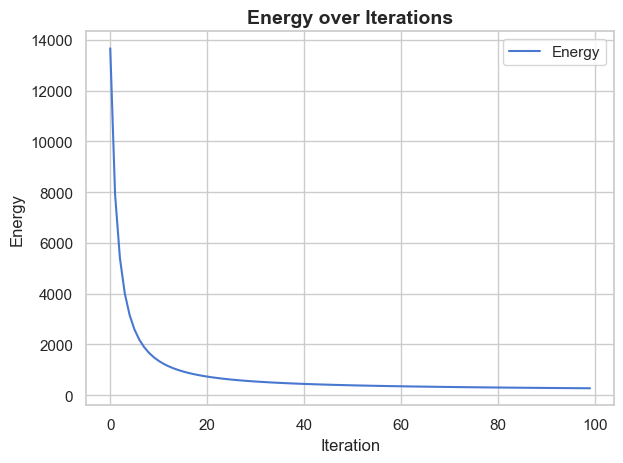

The original image psnr is :  inf dB
The noisy image psnr is :  21.660994730688866 dB
The reconstructed image psnr is :  28.25455723446558 dB


C:\Users\Hani\AppData\Local\Temp\ipykernel_10632\3420143009.py:38: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\Hani\AppData\Local\Temp\ipykernel_10632\3420143009.py:39: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_fixed), "dB")


In [4]:
# Load the gray image
original_img = gray_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)

sigma = 0.01  
lambda_ = 0.01  
N = 100  
m = 5
sigma_denoise = 0.001 

from Fixed_Point_RGB import fixed_point_red_all

restored_img_fixed, energy_values = fixed_point_red_all(
    y = noisy_img,
    kernel= kernel,
    sigma = sigma,
    sigma_f= sigma_denoise,
    lambda_= lambda_,
    N = N,
    m = m

)



show_img(original_img, noisy_img ,restored_img_fixed, titles= ['Original Image', 'Noisy Image','Restored Image Using Fixed Point'])
convergence(energy_values)

print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_fixed), "dB")

## ADMM

100%|██████████| 70/70 [03:18<00:00,  2.84s/it]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.05188322868420424..1.0007179938314152].


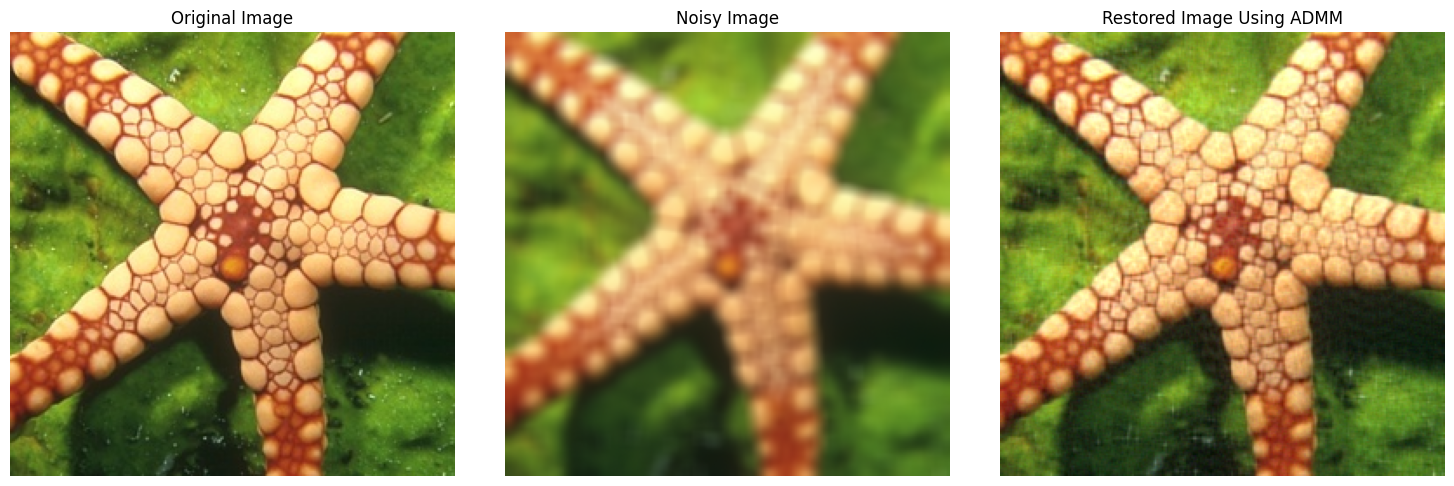

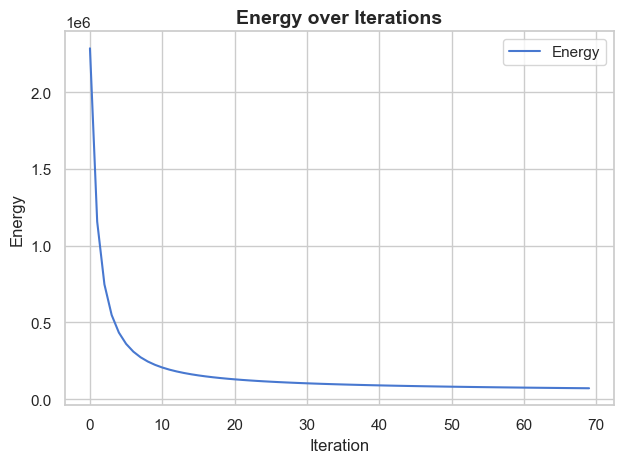

The original image psnr is :  inf dB
The noisy image psnr is :  21.798728721160817 dB
The reconstructed image psnr is :  28.955389691428074 dB


c:\Users\lenonvo\Desktop\Coding Projects\RED DENOISER\RedEnv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_4900\3564551861.py:33: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_4900\3564551861.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_admm), "dB")


In [ ]:
# Load the colored image
original_img = RGB_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)

N = 70        
m1 = 10       
m2 = 1          
lambd = 0.01    
beta = 0.05    
sigma = 0.001  
denoising_sigma = 0.001 
tol=1e-2

from ADMM_RGB import RED_ADMM_Solver_all

noisy_img = np.asarray(noisy_img)
red = RED_ADMM_Solver_all(noisy_img, kernel, denoising_sigma, lambd, beta, sigma, N, m1, m2, tol)
restored_img_admm, energy_values = red.run()
show_img(original_img, noisy_img ,restored_img_admm, titles= ['Original Image', 'Noisy Image','Restored Image Using ADMM'])
convergence(energy_values)


print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_admm), "dB")

100%|██████████| 70/70 [00:57<00:00,  1.21it/s]


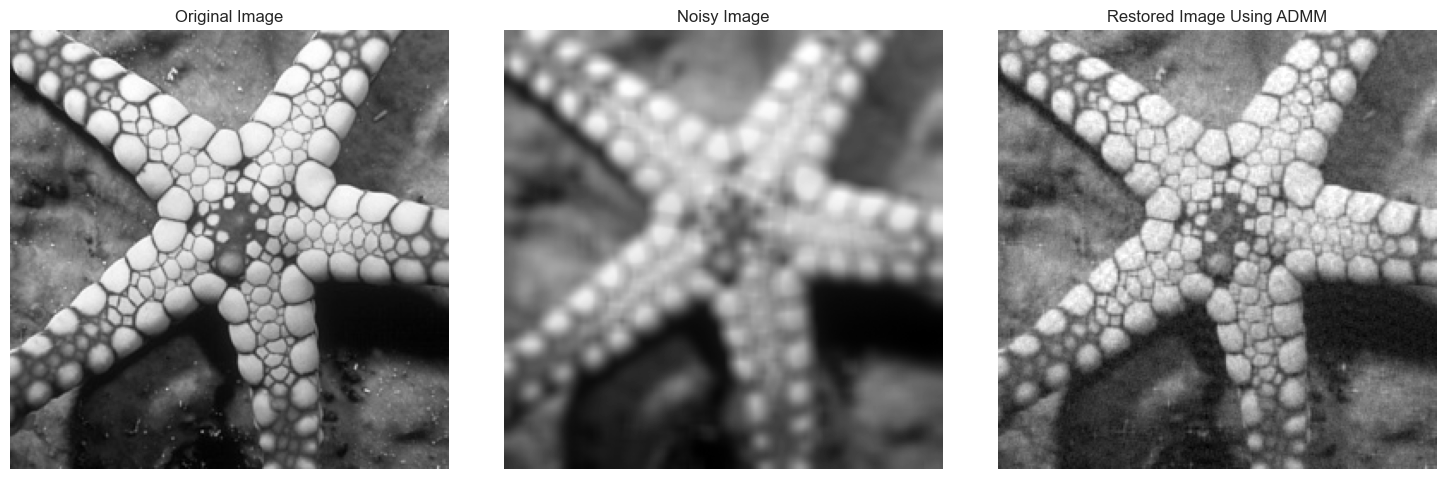

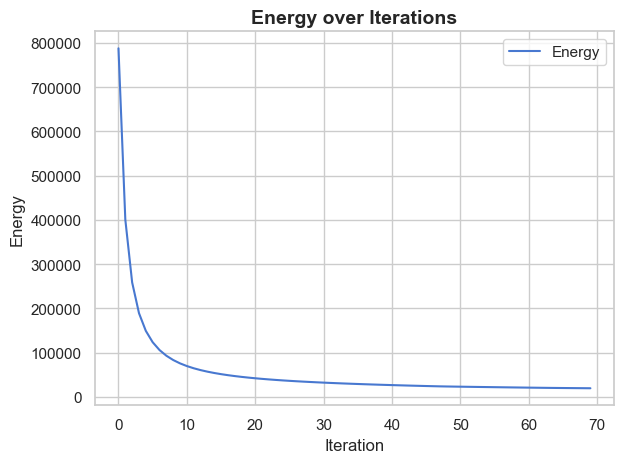

The original image psnr is :  inf dB
The noisy image psnr is :  21.660187324153945 dB
The reconstructed image psnr is :  28.67749221490837 dB


c:\Users\lenonvo\Desktop\Coding Projects\RED DENOISER\RedEnv\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_4900\1251172124.py:33: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
C:\Users\lenonvo\AppData\Local\Temp\ipykernel_4900\1251172124.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("The reconstructed image psnr is : ",psnr(original_img, restored_img_admm), "dB")


In [ ]:
# Load the gray image
original_img = gray_image(img_path)

kernel = generate_gaussian_kernel(kernel_size = 9, sigma_blur = 10)


degraded_img = degradation_operator(original_img, kernel)


noise_std = 0.001
noisy_img = degraded_img + noise_std * np.random.randn(*degraded_img.shape)


N = 70         
m1 = 10       
m2 = 1          
lambd = 0.01     
beta = 0.05      
sigma = 0.001  
denoising_sigma = 0.001 
tol=1e-2

from ADMM_RGB import RED_ADMM_Solver_all

noisy_img = np.asarray(noisy_img)
red = RED_ADMM_Solver_all(noisy_img, kernel, denoising_sigma, lambd, beta, sigma, N, m1, m2, tol)
restored_img_admm, energy_values = red.run()
show_img(original_img, noisy_img ,restored_img_admm, titles= ['Original Image', 'Noisy Image','Restored Image Using ADMM'])
convergence(energy_values)


print("The original image psnr is : ", psnr(original_img, original_img), "dB")
print("The noisy image psnr is : ",psnr(original_img, noisy_img), "dB")
print("The reconstructed image psnr is : ",psnr(original_img, restored_img_admm), "dB")